# 🎨 Part 10: Professional Styling and Exporting with Seaborn (Mapping from Matplotlib Part 5)

**Goal:** Understand how Seaborn's built-in themes and high-level functions replace Matplotlib's manual styling. We will learn to create polished, professional-looking plots, customize legends, and export the final figure.

---

### Key Learning Objectives
1.  Understand the difference between Matplotlib's `plt.style.use()` and Seaborn's `sns.set_theme()`.
2.  Apply Seaborn's core themes (`darkgrid`, `whitegrid`, `ticks`) and color palettes (`sns.set_palette`).
3.  Use the **`hue`** parameter to automatically generate and customize legends.
4.  Combine Seaborn's **Axes-level** functions with Matplotlib's OO interface (`ax.set_...`) for fine-grained control.
5.  Export the final figure using `fig.savefig()`.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set pandas display options (optional, kept from original)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("🎯 LAB 10.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load or create Titanic sample data (Ensure this is available)
titanic_data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08, 26.25, 7.75],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female', 'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1]
})

# Create aggregated data for bar plots
class_data = titanic_data.groupby('Pclass')['Survived'].mean().reset_index()
sex_data = titanic_data.groupby('Sex')['Survived'].mean().reset_index()

# Set a default theme for the rest of the notebook
sns.set_theme(style="ticks")
print("✅ Data loaded and default Seaborn theme set to 'ticks'.")

🎯 LAB 10.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!
✅ Data loaded and default Seaborn theme set to 'ticks'.


## 1. Seaborn Styling (`sns.set_theme`)

Seaborn's biggest advantage is its built-in styling. You don't need `plt.style.use()` anymore. The main function is `sns.set_theme()`.

* `style=` controls the background and grid (e.g., `'darkgrid'`, `'whitegrid'`, `'ticks'`).
* `palette=` controls the color scheme (e.g., `'deep'`, `'muted'`, `'colorblind'`).
* `sns.despine()` removes the top and right axis lines, creating a cleaner look (common with `style="ticks"`).

🎯 LAB 10.2: Exploring Seaborn Themes


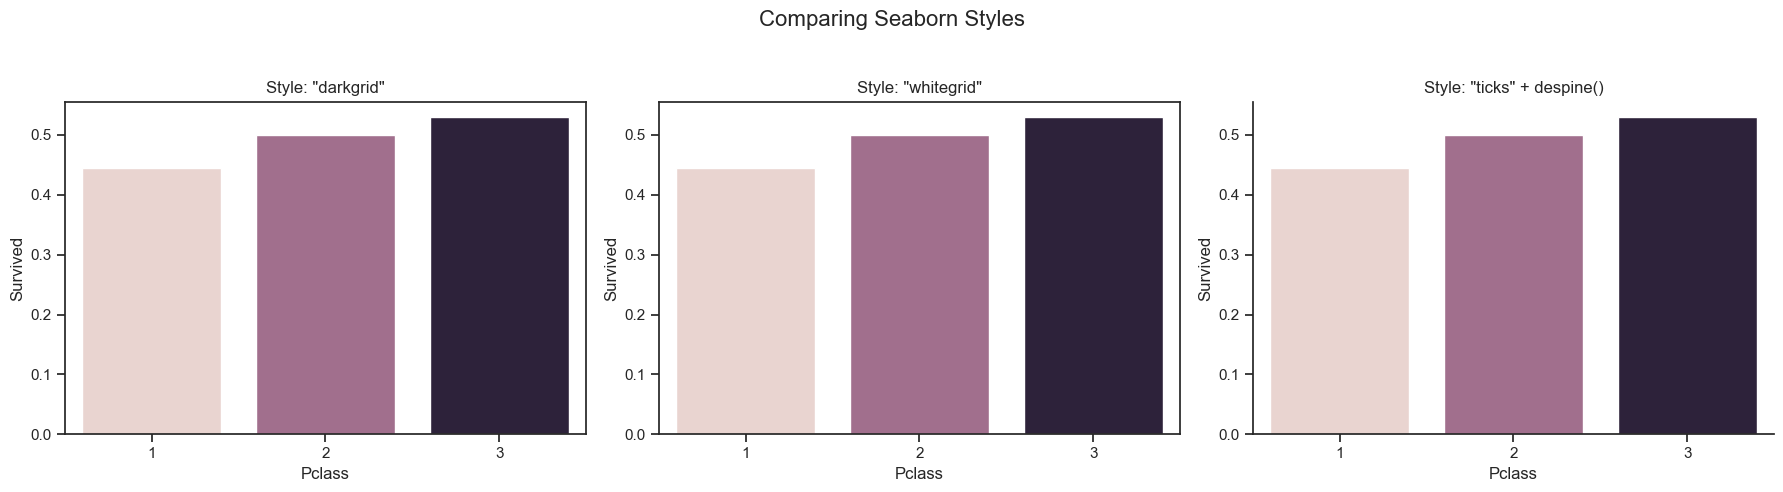


✅ Seaborn's `set_theme` is the primary way to control plot aesthetics.


In [7]:
print("🎯 LAB 10.2: Exploring Seaborn Themes")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Comparing Seaborn Styles", fontsize=16)

# Plot 1: Style 'darkgrid'
sns.set_theme(style="darkgrid", palette="deep")
sns.barplot(data=class_data, x='Pclass', y='Survived', 
            hue='Pclass', ax=axes[0], legend=False) # Use hue+legend=False for palette
axes[0].set_title('Style: "darkgrid"')

# Plot 2: Style 'whitegrid'
sns.set_theme(style="whitegrid", palette="muted")
sns.barplot(data=class_data, x='Pclass', y='Survived', 
            hue='Pclass', ax=axes[1], legend=False)
axes[1].set_title('Style: "whitegrid"')

# Plot 3: Style 'ticks' with despine()
sns.set_theme(style="ticks", palette="bright")
sns.barplot(data=class_data, x='Pclass', y='Survived', 
            hue='Pclass', ax=axes[2], legend=False)
axes[2].set_title('Style: "ticks" + despine()')
sns.despine(ax=axes[2]) # Remove top and right spines

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Reset to a good default for the rest of the notebook
sns.set_theme(style="ticks", palette="deep")
print("\n✅ Seaborn's `set_theme` is the primary way to control plot aesthetics.")

## 2. Advanced Customization & Legends with `hue`

In Matplotlib, you customized each line manually and then built a legend with `ax.legend()`.

In Seaborn, this is much simpler. You use the `hue` parameter to tell Seaborn *which column* to use for coloring. Seaborn automatically:
1.  Splits and plots the data for each category.
2.  Applies different colors.
3.  Generates a complete legend.

You can then customize the plot using standard Matplotlib `ax.set_...` methods.

🎯 LAB 10.3: Customizing plots and automatic legends


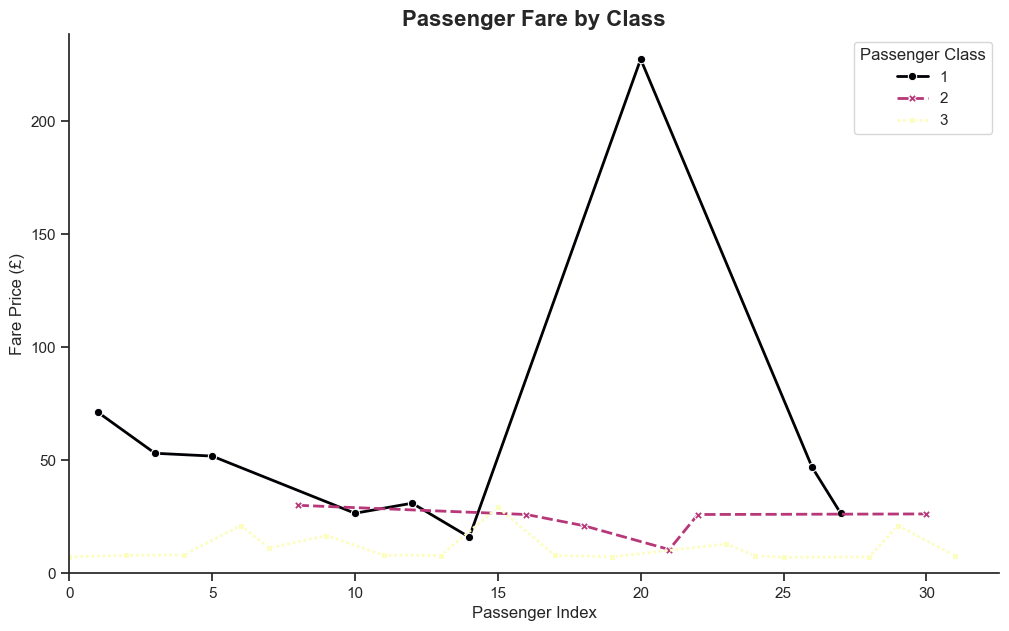


✅ Seaborn's `hue` parameter automatically created and labeled the legend.


In [9]:
print("🎯 LAB 10.3: Customizing plots and automatic legends")

# Create data with two groups
fare_data = titanic_data[['Fare', 'Pclass']].copy()
fare_data['index'] = fare_data.index # Use index for the x-axis

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# --- Seaborn Plotting ---
# Use `hue` to automatically create two lines and a legend.
sns.lineplot(
    data=fare_data, 
    x='index', 
    y='Fare', 
    hue='Pclass',        # This is the magic!
    style='Pclass',      # Optional: give different line styles too
    markers=True,        # Optional: add markers
    palette='magma',     # Use a specific palette for the hue
    linewidth=2,
    ax=ax
)

# --- Matplotlib Customization ---
# We still use ax.set_... for fine-tuning
ax.set_title("Passenger Fare by Class", fontsize=16, fontweight='bold')
ax.set_xlabel("Passenger Index")
ax.set_ylabel("Fare Price (£)")
ax.set_ylim(0) # Start y-axis at 0
ax.set_xlim(0) # Start x-axis at 0

# Customize the Seaborn-generated legend
legend = ax.get_legend()
legend.set_title("Passenger Class")
plt.setp(legend.get_title(), fontsize=12)

# Use sns.despine for a clean look
sns.despine()
plt.show()

print("\n✅ Seaborn's `hue` parameter automatically created and labeled the legend.")

## 3. Practice Project: Professional Plot & Exporting

Let's combine all these concepts to create and export a single, high-quality plot. We will compare survival rates for Males and Females across different Passenger Classes.

This one cell is the final product: it does the plotting, customization, and saving.

🎯 LAB 10.4: PRACTICE PROJECT - Survival Rate by Sex and Class

💾 Plot saved as 'seaborn_part10_survival_report.png'


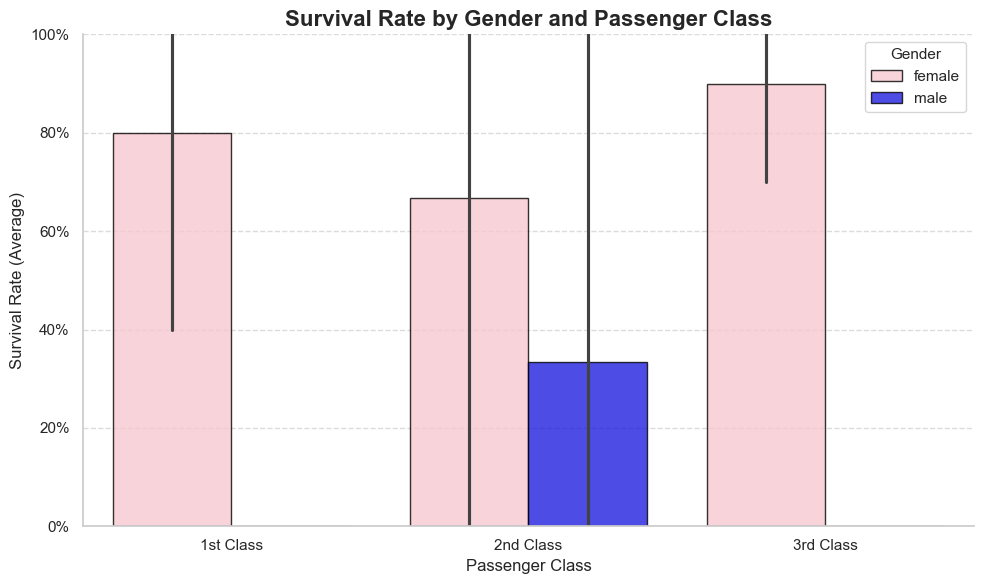


🎉 Part 10 complete! You have successfully styled, customized, and exported a Seaborn plot.


In [10]:
print("🎯 LAB 10.4: PRACTICE PROJECT - Survival Rate by Sex and Class")

# Set a professional theme
sns.set_theme(style="whitegrid", palette="muted")

# 1. Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# 2. Use sns.barplot with `hue`
sns.barplot(
    data=titanic_data,
    x='Pclass',
    y='Survived',
    hue='Sex', # This splits the bars by 'Sex'
    palette={"male": "blue", "female": "pink"}, # Control colors precisely
    alpha=0.8,
    edgecolor='black',
    ax=ax
)

# 3. --- Matplotlib Customization ---
ax.set_title('Survival Rate by Gender and Passenger Class', fontsize=16, fontweight='bold')
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Survival Rate (Average)', fontsize=12)

# 4. FIX UserWarning: Set tick positions *before* setting labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])

# Set y-axis to be a percentage
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))

# Customize the legend
legend = ax.get_legend()
legend.set_title("Gender")
plt.setp(legend.get_title(), fontsize='11')

# Add a grid to the y-axis
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove unnecessary spines
sns.despine()

plt.tight_layout()

# 5. --- Exporting ---
# Save the figure to a file. 
# We call this *before* plt.show().
try:
    fig.savefig(
        'seaborn_part10_survival_report.png', 
        dpi=300, 
        bbox_inches='tight' # Ensures labels aren't cut off
    )
    print("\n💾 Plot saved as 'seaborn_part10_survival_report.png'")
except Exception as e:
    print(f"\n❌ Error saving plot: {e}")

# 6. Show the plot
plt.show()

print("\n🎉 Part 10 complete! You have successfully styled, customized, and exported a Seaborn plot.")